In [9]:
import numpy as np
import matplotlib.pyplot as plt
import io
import SurfaceTopography.Uniform.GeometryAnalysis as CAA
from mpl_toolkits.mplot3d import Axes3D

In [10]:
from ContactMechanics import PeriodicFFTElasticHalfSpace, FreeFFTElasticHalfSpace
from SurfaceTopography import Topography
from SurfaceTopography import make_sphere
from ContactMechanics.Factory import make_system
from ContactMechanics.Systems import NonSmoothContactSystem
from ContactMechanics.Tools.Logger import screen

In [11]:
sx,sy= 1., 1.

In [28]:
Es =  1/np.pi

/tmp/ipykernel_258/1022413521.py:6: RuntimeWarning: divide by zero encountered in divide
  theta = np.arctan(y/x, out = theta_out, where = x!=0 )
/tmp/ipykernel_258/1022413521.py:6: RuntimeWarning: invalid value encountered in divide
  theta = np.arctan(y/x, out = theta_out, where = x!=0 )


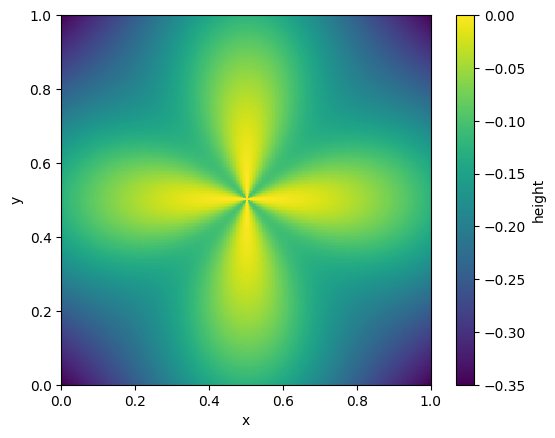

In [53]:
nx, ny = 256,256

x = np.arange(nx).reshape(-1,  1) * sx / nx - sx/2
y = np.arange(ny).reshape( 1, -1) * sy / ny - sy/2
theta_out = np.zeros((nx,ny))
theta = np.arctan(y/x, out = theta_out, where = x!=0 )
#h_m = 1/np.pi
R = 1
r = np.sqrt((x*x)+(y*y))
h_m = r*r/(2*R)

h =-( h_m + 0.05*(1-np.cos(4*theta_out)))
topography1 = Topography(h, physical_sizes=(sx, sy), periodic=True)

fig, ax = plt.subplots()

X, Y = np.meshgrid(np.arange(nx+1) * sx/nx, np.arange(ny+1) * sy/ny, indexing='ij') 
pcm = ax.pcolormesh(X,Y, topography1.heights())
cb = plt.colorbar(pcm,ax= ax, label= "height")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect(1)

/tmp/ipykernel_1366/1687882662.py:7: RuntimeWarning: divide by zero encountered in divide
  theta = np.arctan(y/x, out = theta_out, where = x!=0 )
/tmp/ipykernel_1366/1687882662.py:7: RuntimeWarning: invalid value encountered in divide
  theta = np.arctan(y/x, out = theta_out, where = x!=0 )


0.988037109375
0.9871063232421875


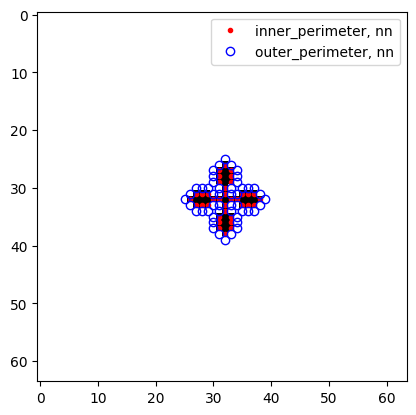

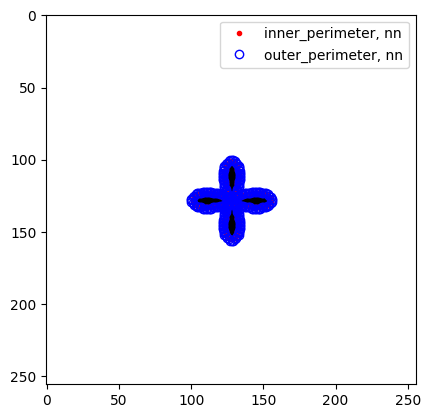

In [30]:
for p in [6, 8, ]:
    nx, ny = 2 ** p, 2 ** p
    
    x = np.arange(nx).reshape(-1,  1) * sx / nx - sx/2
    y = np.arange(ny).reshape( 1, -1) * sy / ny - sy/2
    theta_out = np.zeros((nx,ny))
    theta = np.arctan(y/x, out = theta_out, where = x!=0 )
    #h_m = 1/np.pi
    R = 1
    r = np.sqrt((x*x)+(y*y))
    h_m = r*r/(2*R)

    h = h_m + 0.005*(1-np.cos(4*theta_out))
    topography1 = Topography(h, physical_sizes=(sx, sy), periodic=True)
    substrate = PeriodicFFTElasticHalfSpace(nb_grid_pts=(nx,ny), young=Es, physical_sizes = (sx, sy))
    system1 = make_system(substrate, topography1)
    offset = 0
    
    external_force = 0.1
    contact_areas = []
    normal_forces = []
    disp0 = None
    i=0
    
    sol1 = system1.minimize_proxy(external_force=external_force, initial_displacements = disp0, pentol=1e-10)
    assert sol1.success
    disp0 = system1.disp
    print(system1.compute_contact_area())
    contact_areas.append(system1.compute_contact_area())
    normal_forces.append(system1.compute_normal_force())
    
    
    contacting_points = ~system1.contact_zone
    Nx, Ny = contacting_points.shape
    x,y = np.mgrid[:Nx, :Ny]
    fig, ax = plt.subplots()
    ax.imshow(contacting_points.T, cmap="Greys")
    iper = CAA.inner_perimeter_area(contacting_points, True, stencil=CAA.nn_stencil)
    ax.plot(x[iper], y[iper], ".r", label="inner_perimeter, nn")
    oper = CAA.outer_perimeter_area(contacting_points, True, stencil=CAA.nn_stencil)
    ax.plot(x[oper], y[oper], "ob", mfc="none", label="outer_perimeter, nn")
    
    ax.legend()
        
    